In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style()
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Shape:  (50000, 2)
positive    25000
negative    25000
Name: sentiment, dtype: int64


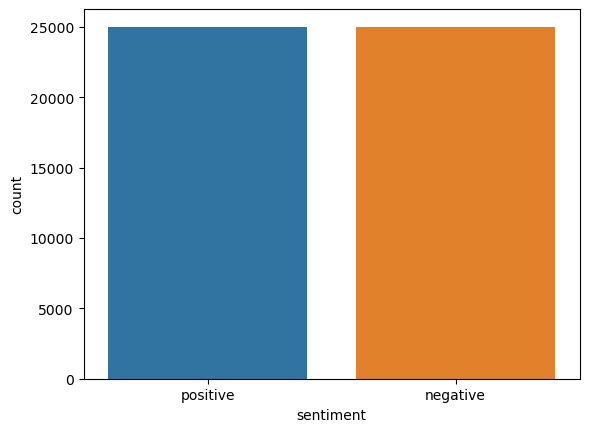

In [3]:
print('Shape: ', df.shape)
print(df['sentiment'].value_counts())
sns.countplot(x=df['sentiment']);

In [4]:
df['review'] = df['review'].apply(lambda x: x.replace('<br />', ''))
df['sentiment'].replace(['negative', 'positive'], [0, 1], inplace=True)

tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['review'].apply(tokenizer.tokenize)

stopwords = stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [w.lower() for w in x if w.lower() not in stopwords])

In [5]:
X = df['review']
y = df['sentiment']

kfold = StratifiedKFold(n_splits=10)
for i, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [6]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", LogisticRegression()),
])

pipeline_lr.fit(X_train, y_train)
print(f'train score: {pipeline_lr.score(X_train, y_train)}')
print(f'test score: {pipeline_lr.score(X_test, y_test)}')

train score: 0.9444
test score: 0.8994


In [7]:
y_pred = pipeline_lr.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      2500
    Positive       0.89      0.91      0.90      2500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

F1 Score:  0.9000993048659384
